# 库

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [2]:
data_clean = pd.read_csv ('data_clean.csv',index_col=0)

In [3]:
data_clean.head()

status_type  status_published  num_reactions  num_comments  \
status_id                                                               
1                    3              3949            529           512   
2                    1              3917            150             0   
3                    3              3921            227           236   
4                    1              3920            111             0   
5                    1              3832            213             0   

           num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
status_id                                                                    
1                 262        432         92         3          1         1   
2                   0        150          0         0          0         0   
3                  57        204         21         1          1         0   
4                   0        111          0         0          0         0   
5                   0        204          9         0          0         0   

           num_angrys  new_reaction_count  postive_reactions  \
status_id                                                      
1                   0                  97                527   
2                   0                   0                150   
3                   0                  23                226   
4                   0                   0                111   
5                   0                   9                213   

           negative_reactions  interesting  
status_id                                   
1                           2     1.463138  
2                           0     0.000000  
3                           1     1.290749  
4                           0     0.000000  
5                           0     0.000000

In [4]:
names=['status_type','status_published', 'num_reactions', 'num_comments', 'num_shares', 'num_likes',
       'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys',
       'new_reaction_count','postive_reactions','negative_reactions','interesting']

# 数据可视化：status_type计数

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Status Type')]

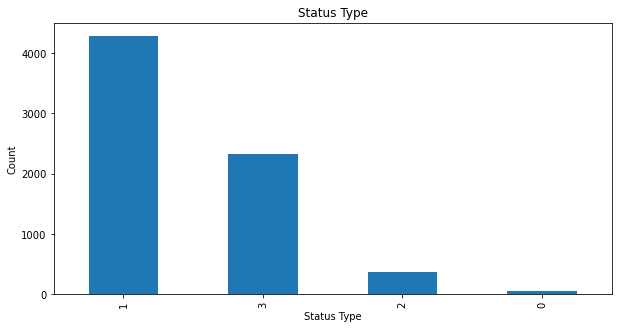

In [5]:
st_ax = data_clean.status_type.value_counts().plot(kind='bar', figsize=(10,5), title="Status Type")
st_ax.set(xlabel="Status Type", ylabel="Count")

# 数据可视化：数据取值分布

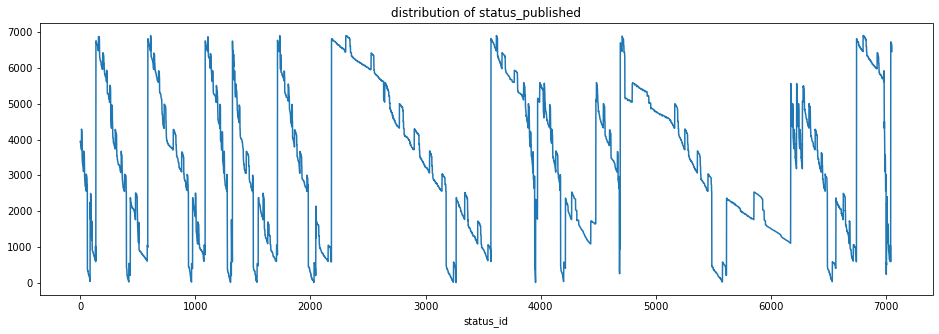

In [6]:
data_clean.status_published.plot(kind='line', figsize=(16,5), title='distribution of status_published')

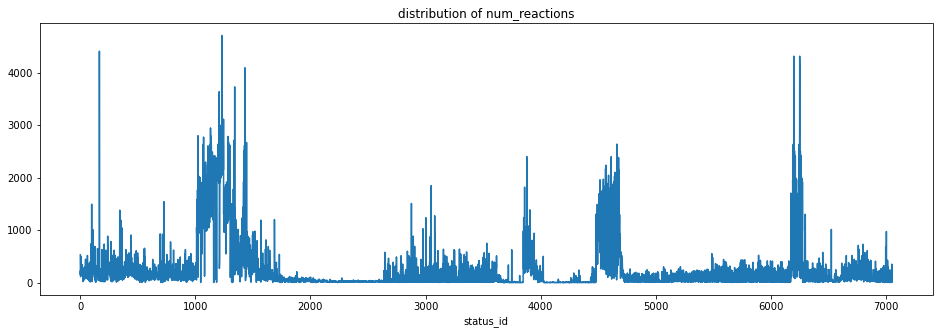

In [7]:
data_clean.num_reactions.plot(kind='line', figsize=(16,5), title='distribution of num_reactions')

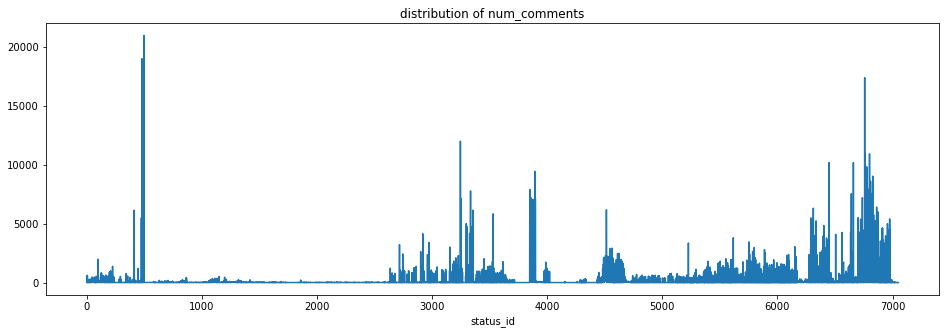

In [8]:
data_clean.num_comments.plot(kind='line', figsize=(16,5), title='distribution of num_comments')

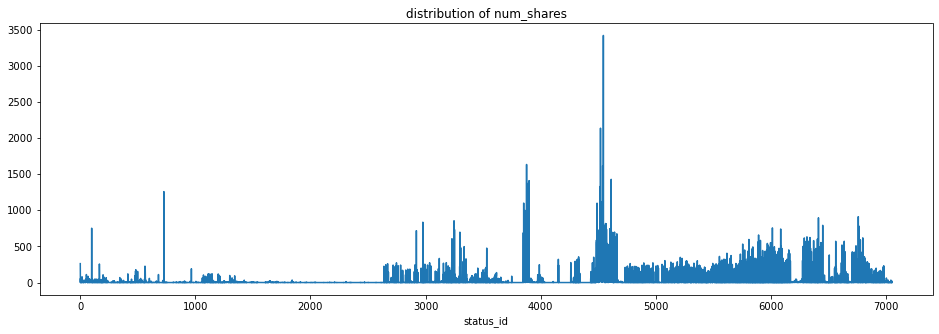

In [9]:
data_clean.num_shares.plot(kind='line', figsize=(16,5), title='distribution of num_shares')

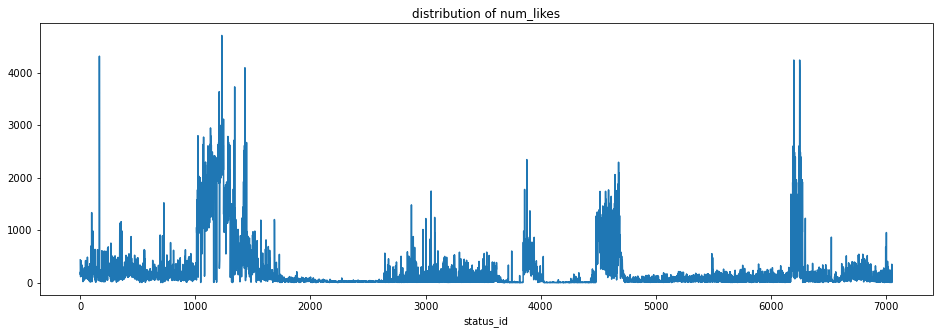

In [10]:
data_clean.num_likes.plot(kind='line', figsize=(16,5), title='distribution of num_likes')

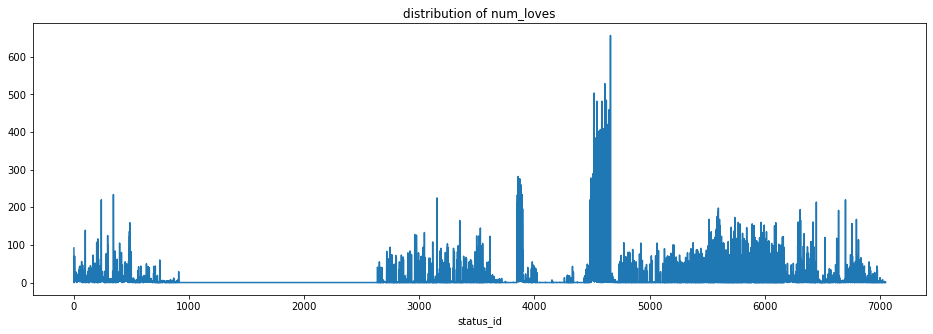

In [11]:
data_clean.num_loves.plot(kind='line', figsize=(16,5), title='distribution of num_loves')

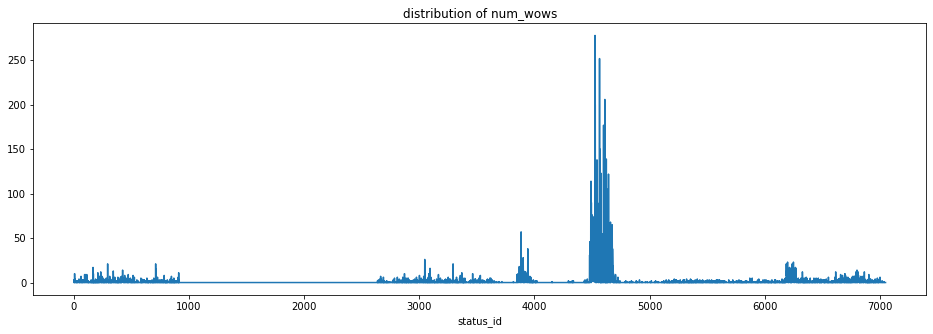

In [12]:
data_clean.num_wows.plot(kind='line', figsize=(16,5), title='distribution of num_wows')

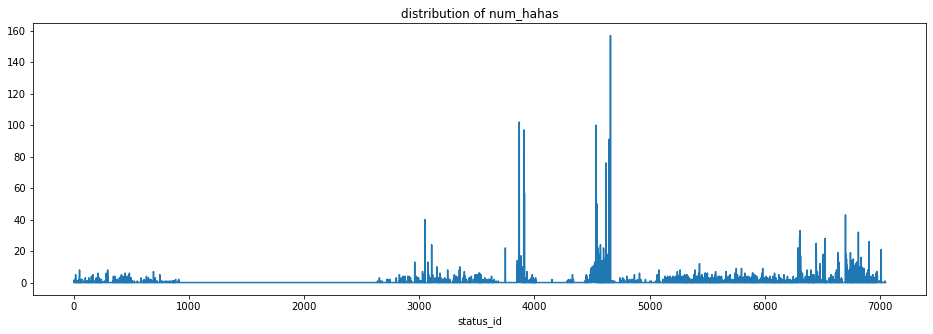

In [13]:
data_clean.num_hahas.plot(kind='line', figsize=(16,5), title='distribution of num_hahas')

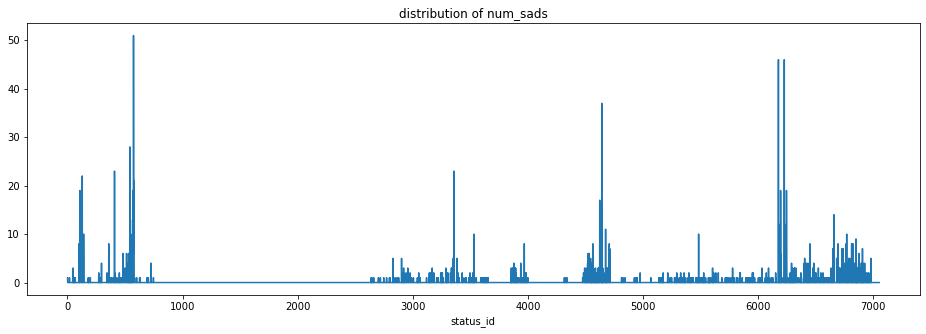

In [14]:
data_clean.num_sads.plot(kind='line', figsize=(16,5), title='distribution of num_sads')

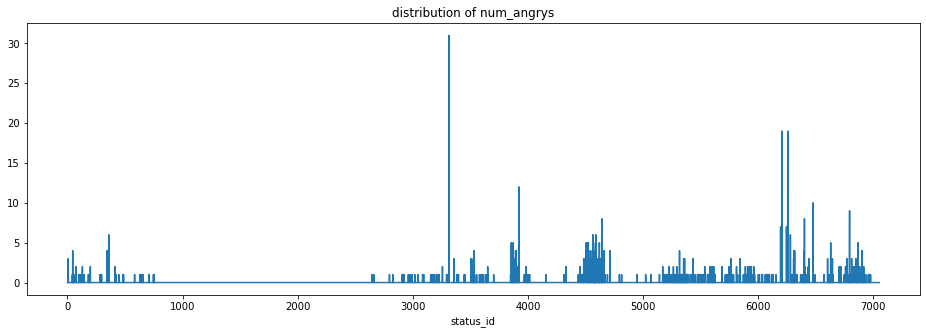

In [15]:
data_clean.num_angrys.plot(kind='line', figsize=(16,5), title='distribution of num_angrys')

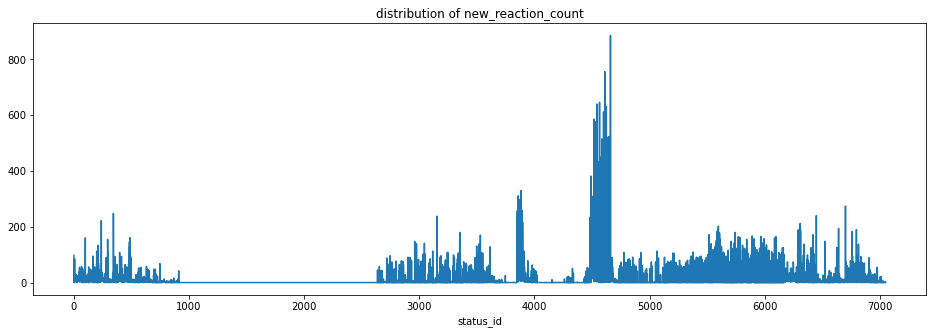

In [16]:
data_clean.new_reaction_count.plot(kind='line', figsize=(16,5), title='distribution of new_reaction_count')

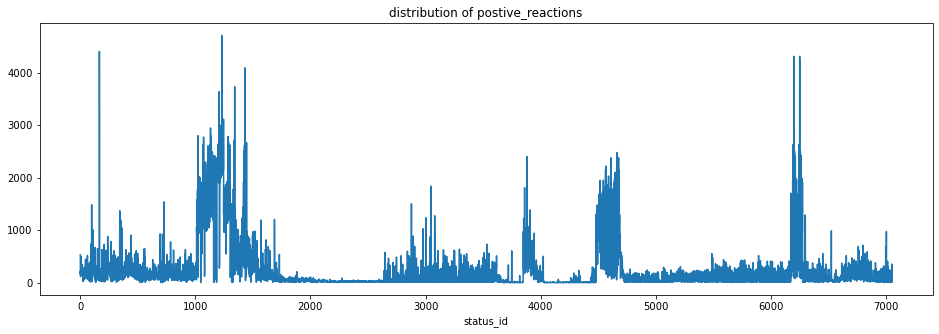

In [17]:
data_clean.postive_reactions.plot(kind='line', figsize=(16,5), title='distribution of postive_reactions')

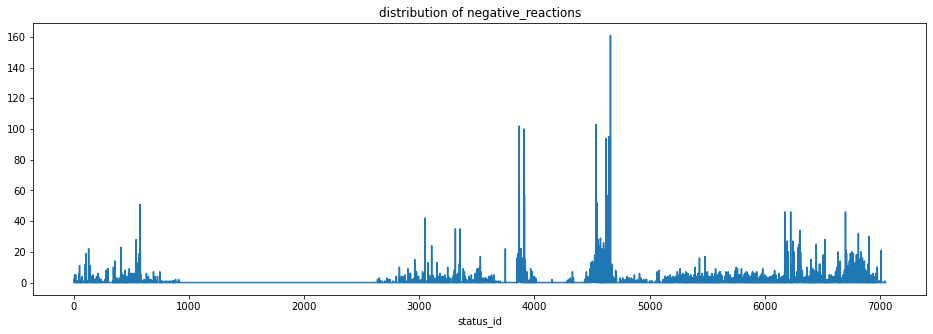

In [18]:
data_clean.negative_reactions.plot(kind='line', figsize=(16,5), title='distribution of negative_reactions')

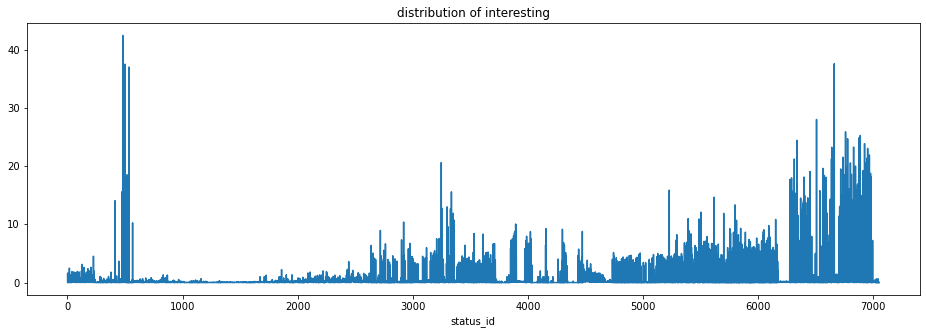

In [19]:
data_clean.interesting.plot(kind='line', figsize=(16,5), title='distribution of interesting')

# 数据可视化：频率分布直方图与箱线图

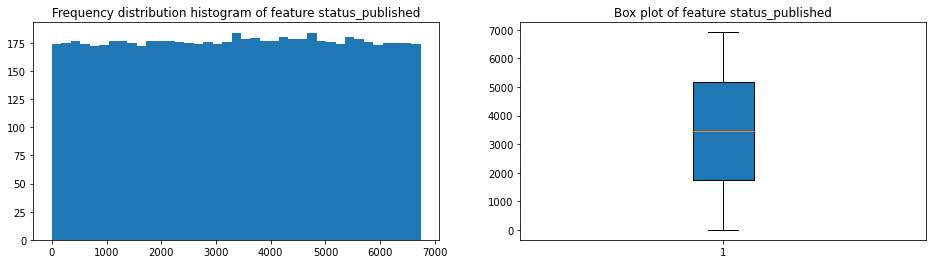

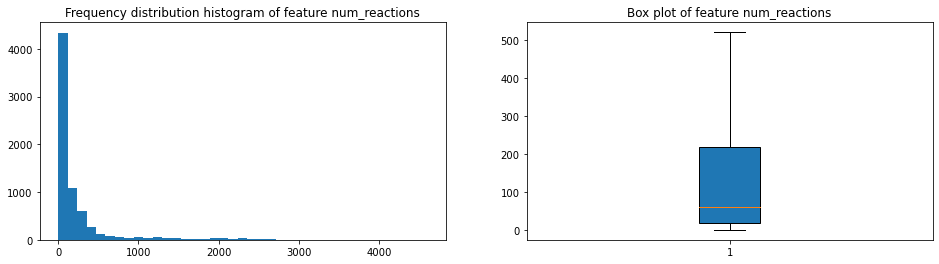

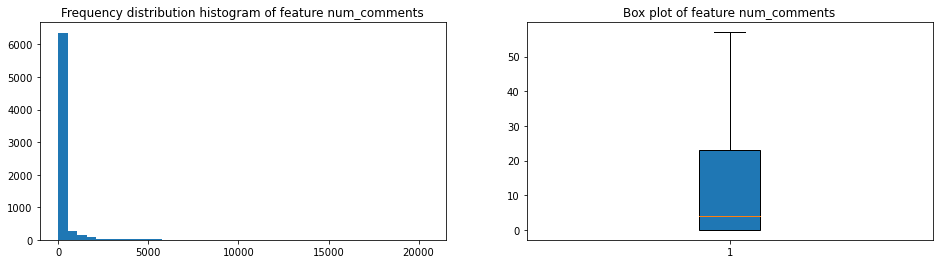

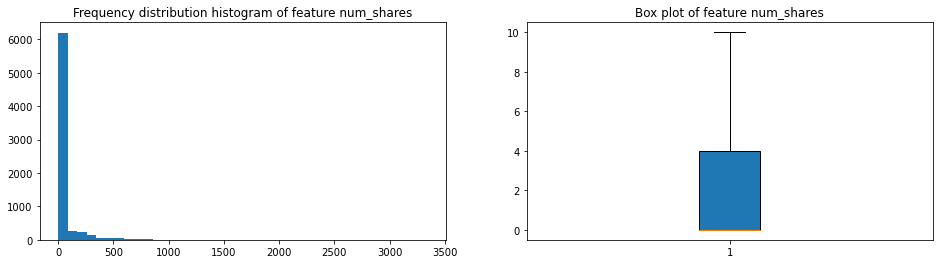

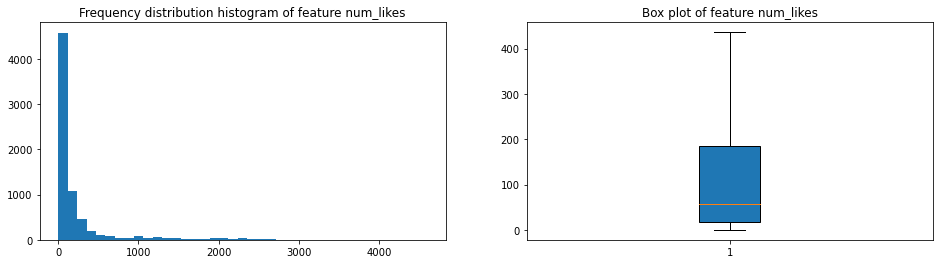

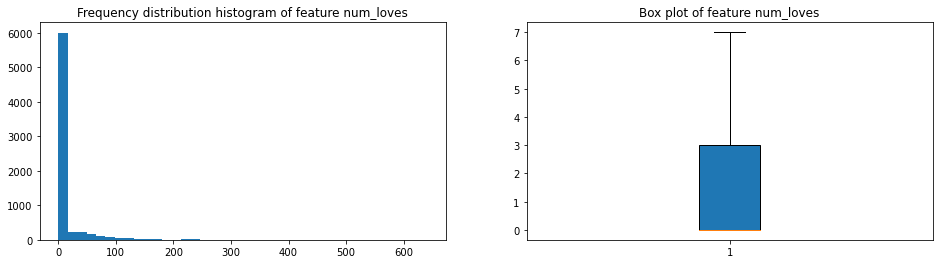

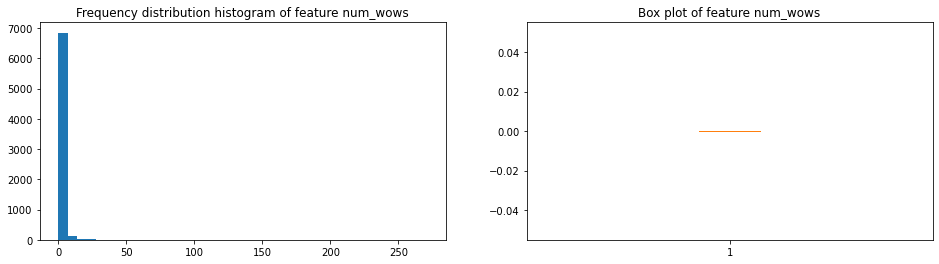

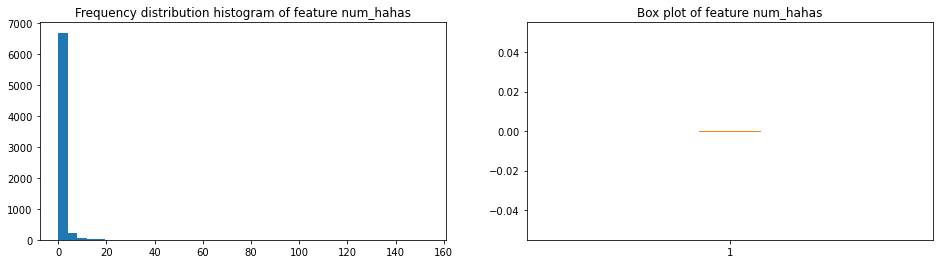

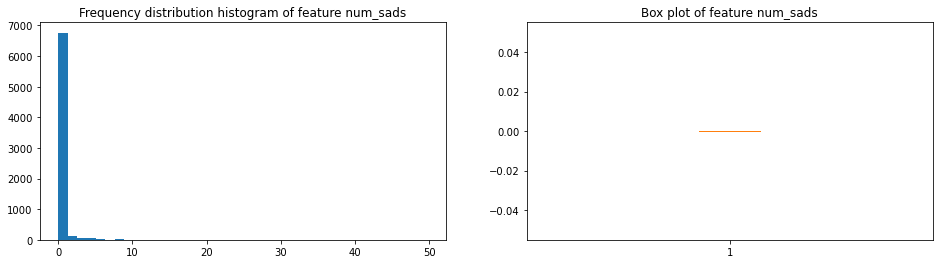

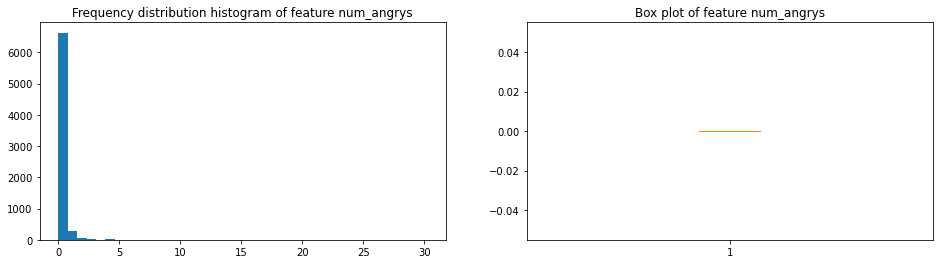

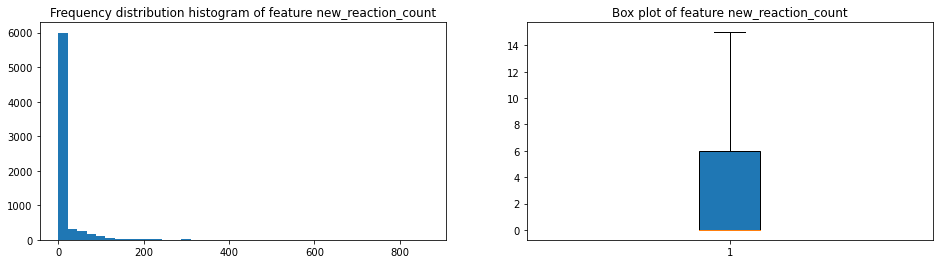

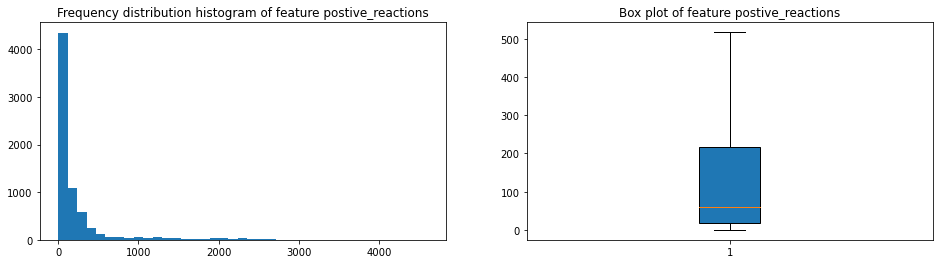

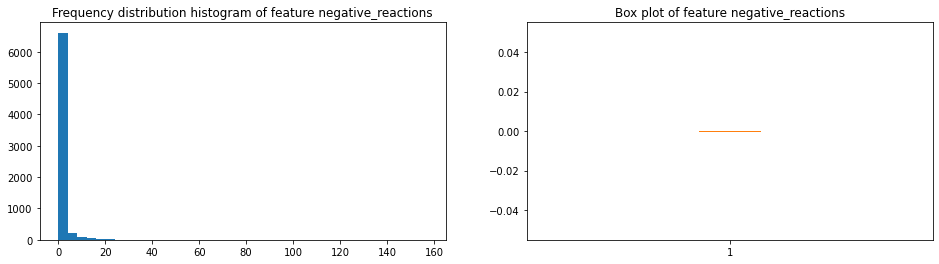

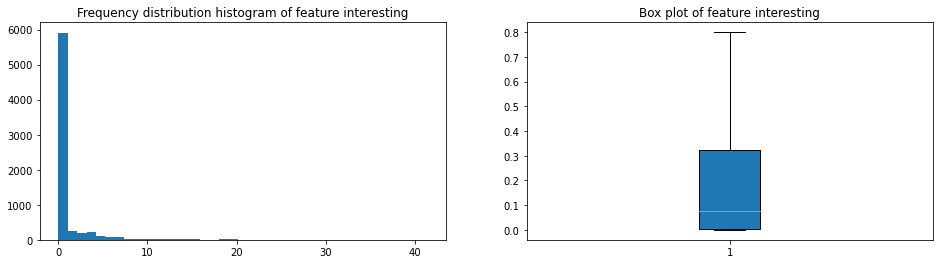

In [21]:
D_array = np.array(data_clean)
for feature in range(1,len(D_array[0])):
    plt.figure(figsize=(16, 4))
    plt.subplot(121)
    plt.hist(D_array[:,feature], np.arange(min(D_array[:,feature]), max(D_array[:,feature]), (max(D_array[:,feature])-min(D_array[:,feature]))/40).tolist())
    plt.title('Frequency distribution histogram of feature ' + names[feature])
    plt.subplot(122)
    plt.boxplot(D_array[:,feature], showfliers = True, sym = '', vert=True, patch_artist=True)
    plt.title('Box plot of feature ' + names[feature])
    plt.show()

# 数据可视化：整体散点密度图与相关矩阵

There are 7050 rows and 16 columns


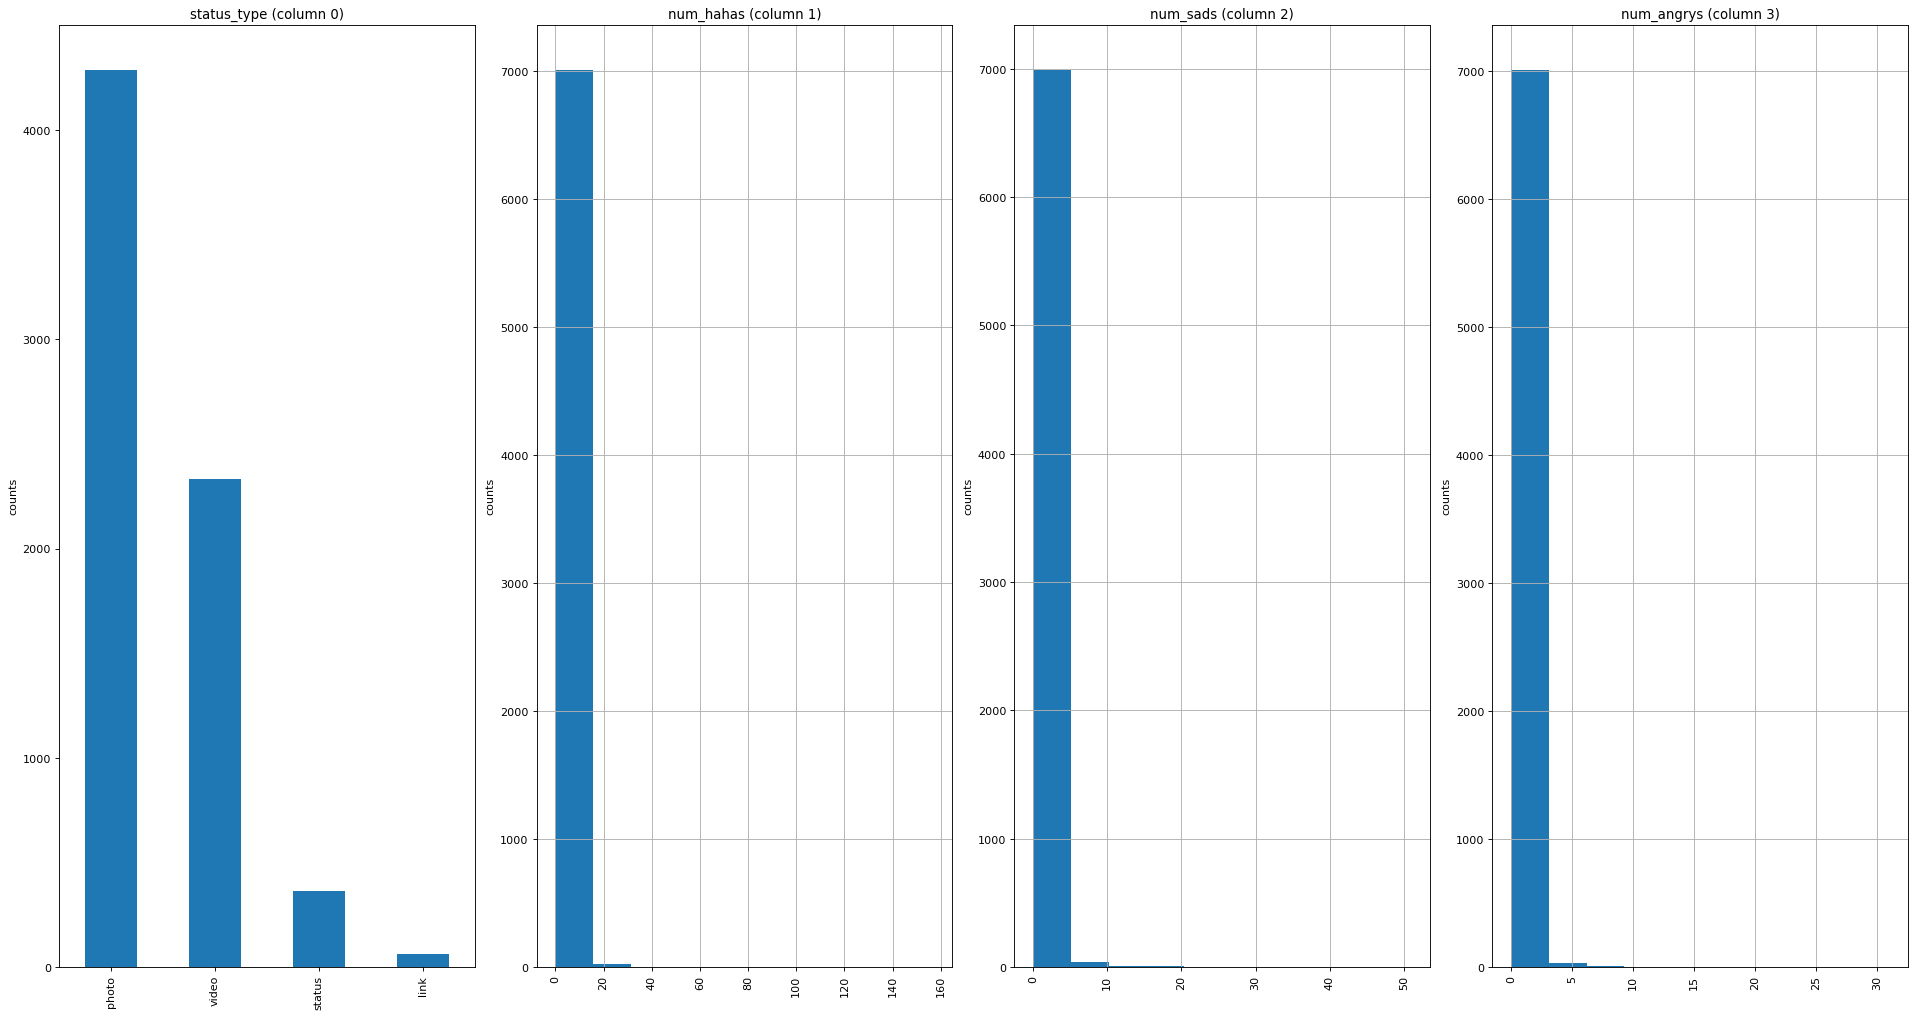

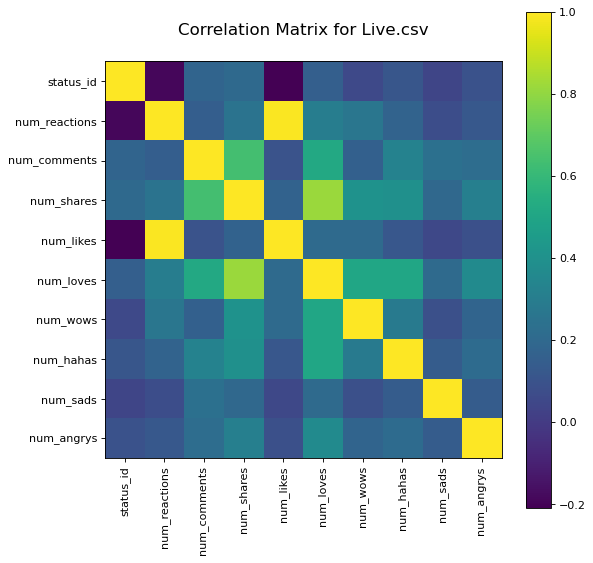

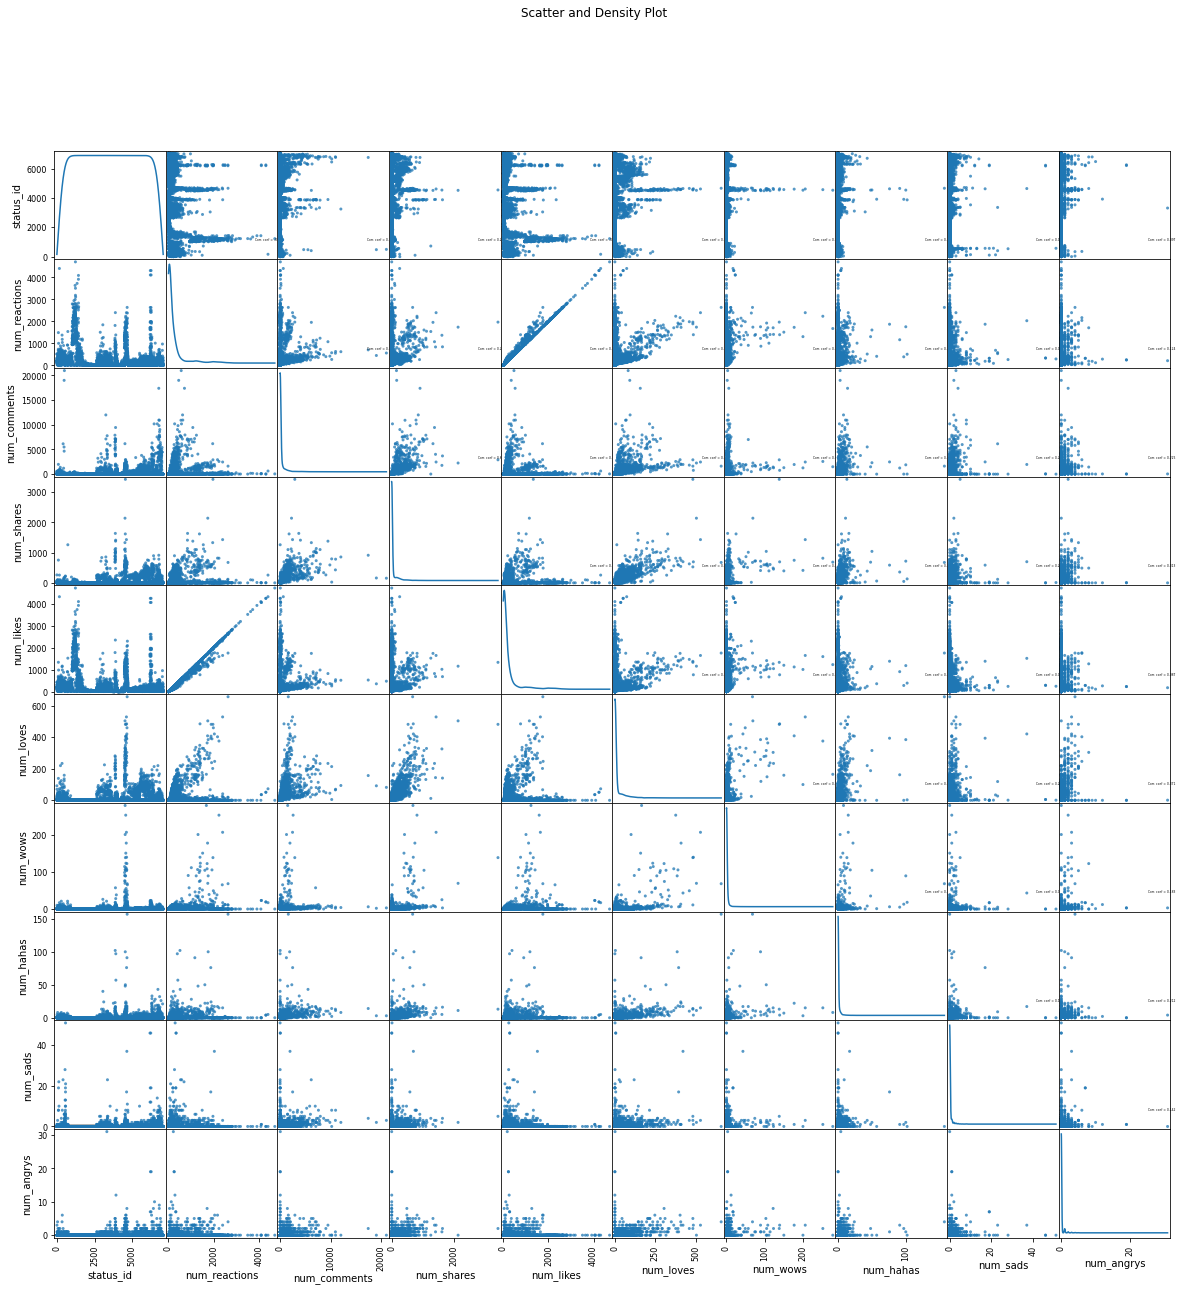

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='left', va='top', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

nRowsRead = 7050# specify 'None' if want to read whole file
# Live.csv has 7050 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('Live.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Live.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

plotPerColumnDistribution(df1, 10, 5)
plotCorrelationMatrix(df1, 8)
plotScatterMatrix(df1, 20, 3)